# WeatherPy
----

#### Observations
* The closest the city is to the equator, the highest is the max temperature for most of the cities.
* There is a strong correlation between temperature and latitude for the northern and southern hemispheres.
* For the northern and southern hemispheres, there are weak collections between latitude and cloudiness, latitude and wind speed, and latitude and humidity.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cities_found = []
lat = []
lon = []
temp_max = []
humidity = []
clouds = []
wind = []
country = []
date = []

url = "http://api.openweathermap.org/data/2.5/weather?"
units  = "imperial"

record_number = 0
set_number = 1
for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    weather = requests.get(query_url).json()
    
    try:
        lat.append(weather['coord']['lat'])
        lon.append(weather['coord']['lon'])
        temp_max.append(weather['main']['temp_max'])
        humidity.append(weather['main']['humidity'])
        clouds.append(weather['clouds']['all'])
        wind.append(weather['wind']['speed'])
        country.append(weather['sys']['country'])
        date.append(weather['dt'])
        cities_found.append(city)
        record_number += 1
        print (f"Processing Record {record_number} of set {set_number} | {city}")
    except:
        print("City not found. Skipping...")
        pass
    
    if record_number == 50:
        time.sleep(1)
        set_number +=1
        record_number = 0
    
        


Processing Record 1 of set 1 | coihaique
Processing Record 2 of set 1 | punta arenas
Processing Record 3 of set 1 | mataura
Processing Record 4 of set 1 | bengkulu
Processing Record 5 of set 1 | cape town
Processing Record 6 of set 1 | port alfred
Processing Record 7 of set 1 | new norfolk
Processing Record 8 of set 1 | lahat
Processing Record 9 of set 1 | vaini
City not found. Skipping...
City not found. Skipping...
Processing Record 10 of set 1 | khatanga
Processing Record 11 of set 1 | ponta do sol
Processing Record 12 of set 1 | cayenne
Processing Record 13 of set 1 | lorengau
City not found. Skipping...
Processing Record 14 of set 1 | arraial do cabo
City not found. Skipping...
Processing Record 15 of set 1 | bluff
Processing Record 16 of set 1 | pisco
City not found. Skipping...
Processing Record 17 of set 1 | busselton
City not found. Skipping...
Processing Record 18 of set 1 | atuona
Processing Record 19 of set 1 | namibe
Processing Record 20 of set 1 | provideniya
Processing R

Processing Record 36 of set 4 | flin flon
Processing Record 37 of set 4 | sikasso
Processing Record 38 of set 4 | karasjok
Processing Record 39 of set 4 | omboue
Processing Record 40 of set 4 | takoradi
Processing Record 41 of set 4 | santa isabel do rio negro
City not found. Skipping...
Processing Record 42 of set 4 | egvekinot
Processing Record 43 of set 4 | nenjiang
City not found. Skipping...
Processing Record 44 of set 4 | bardiyah
Processing Record 45 of set 4 | guadalupe y calvo
Processing Record 46 of set 4 | nanortalik
Processing Record 47 of set 4 | sambava
Processing Record 48 of set 4 | nome
City not found. Skipping...
Processing Record 49 of set 4 | laguna
Processing Record 50 of set 4 | bonavista
Processing Record 1 of set 5 | grand gaube
Processing Record 2 of set 5 | san juan
Processing Record 3 of set 5 | hilo
Processing Record 4 of set 5 | zhigansk
Processing Record 5 of set 5 | ostrovnoy
Processing Record 6 of set 5 | lompoc
Processing Record 7 of set 5 | saskylakh
P

Processing Record 23 of set 8 | nchelenge
Processing Record 24 of set 8 | bilibino
Processing Record 25 of set 8 | kindu
Processing Record 26 of set 8 | caxito
Processing Record 27 of set 8 | kendari
Processing Record 28 of set 8 | chute-aux-outardes
Processing Record 29 of set 8 | sola
Processing Record 30 of set 8 | vila franca do campo
Processing Record 31 of set 8 | mazamari
Processing Record 32 of set 8 | bandarban
Processing Record 33 of set 8 | vestmannaeyjar
Processing Record 34 of set 8 | mareeba
Processing Record 35 of set 8 | fukue
Processing Record 36 of set 8 | gao
Processing Record 37 of set 8 | lodwar
Processing Record 38 of set 8 | lavrentiya
Processing Record 39 of set 8 | semnan
Processing Record 40 of set 8 | mala tokmachka
Processing Record 41 of set 8 | hervey bay
Processing Record 42 of set 8 | rio grande
Processing Record 43 of set 8 | xuanhua
Processing Record 44 of set 8 | mount isa
Processing Record 45 of set 8 | mount gambier
Processing Record 46 of set 8 | b

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {'City': cities_found,
                'Lat' : lat,
                'Lng' : lon,
                "Max_Temp" : temp_max,
                "Humidity" : humidity,
                "Cloudiness" : clouds,
                "Wind_Speed" : wind,
                "Country" : country,
                "Date" : date}

weather_df = pd.DataFrame(weather_dict)
weather_df.to_csv(output_data_file, index_label='City_ID', header=True)
weather_df.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,coihaique,-45.5752,-72.0662,48.00,95,88,4.70,CL,1619757774
1,punta arenas,-53.1500,-70.9167,42.80,93,90,5.75,CL,1619757701
2,mataura,-46.1927,168.8643,53.01,72,24,10.00,NZ,1619757689
3,bengkulu,-3.8004,102.2655,81.64,78,98,5.66,ID,1619757722
4,cape town,-33.9258,18.4232,57.99,77,20,12.66,ZA,1619757496


In [5]:
summary_all=weather_df.describe()
summary_all

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,5.600000e+02
mean,19.793239,24.165898,62.509768,69.042857,53.008929,7.258518,1.619758e+09
std,33.259676,88.991416,19.037508,22.978989,38.093308,4.814163,9.710903e+01
min,-54.800000,-179.166700,13.780000,7.000000,0.000000,0.220000,1.619757e+09
25%,-8.111775,-53.201425,48.182500,58.000000,15.000000,3.650000,1.619758e+09
50%,22.426100,29.809250,66.000000,74.000000,60.500000,6.365000,1.619758e+09
75%,47.923625,101.136025,78.040000,86.000000,90.000000,9.260000,1.619758e+09
max,78.218600,179.316700,101.800000,100.000000,100.000000,29.590000,1.619758e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
num_hum_gret_100 = len(weather_df.loc[weather_df['Humidity']<=100])


In [7]:
num_hum_gret_100 = len(weather_df.loc[weather_df['Humidity']<=100])

if num_hum_gret_100 > 0:
    weather_hum_df = weather_df.loc[weather_df['Humidity']<=100]
    summary_all=weather_hum_df.describe()
    
summary_all


,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,5.600000e+02
mean,19.793239,24.165898,62.509768,69.042857,53.008929,7.258518,1.619758e+09
std,33.259676,88.991416,19.037508,22.978989,38.093308,4.814163,9.710903e+01
min,-54.800000,-179.166700,13.780000,7.000000,0.000000,0.220000,1.619757e+09
25%,-8.111775,-53.201425,48.182500,58.000000,15.000000,3.650000,1.619758e+09
50%,22.426100,29.809250,66.000000,74.000000,60.500000,6.365000,1.619758e+09
75%,47.923625,101.136025,78.040000,86.000000,90.000000,9.260000,1.619758e+09
max,78.218600,179.316700,101.800000,100.000000,100.000000,29.590000,1.619758e+09


In [8]:
#  Get the indices of cities that have humidity over 100%.

humidity_index = weather_df[weather_df['Humidity'] > 100].index
humidity_index

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = weather_df.drop(humidity_index, inplace = False)
clean_city_data.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,coihaique,-45.5752,-72.0662,48.00,95,88,4.70,CL,1619757774
1,punta arenas,-53.1500,-70.9167,42.80,93,90,5.75,CL,1619757701
2,mataura,-46.1927,168.8643,53.01,72,24,10.00,NZ,1619757689
3,bengkulu,-3.8004,102.2655,81.64,78,98,5.66,ID,1619757722
4,cape town,-33.9258,18.4232,57.99,77,20,12.66,ZA,1619757496


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

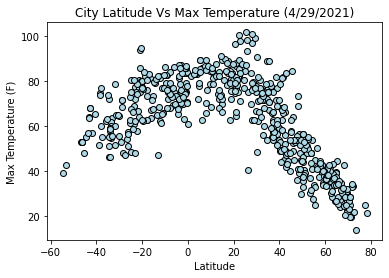

In [38]:

timestamp = clean_city_data.Date[0]
dt_object = datetime.fromtimestamp(timestamp)
year = dt_object.year
month= dt_object.month
day= dt_object.day
date = str(month) + "/" + str(day) + "/" + str(year)

x_axis = clean_city_data.Lat
y_axis = clean_city_data.Max_Temp
plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="black")
plt.title(f"City Latitude Vs Max Temperature ({date})" )
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig('../output_data/Fig01.png')
plt.show()

The map is showing max temperature of a city related to the latitude. The cities around latitude 30 have the max temperature around 100.

## Latitude vs. Humidity Plot

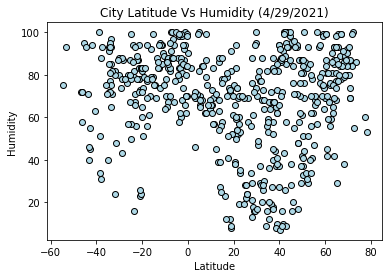

In [39]:
x_axis = clean_city_data.Lat
y_axis = clean_city_data.Humidity
plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="black")
plt.title(f"City Latitude Vs Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig('../output_data/Fig02.png')
plt.show()

The map is showing that the humidity of a city is not related to the latitude.

## Latitude vs. Cloudiness Plot

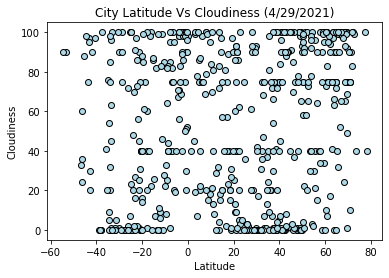

In [40]:
x_axis = clean_city_data.Lat
y_axis = clean_city_data.Cloudiness
plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="black")
plt.title(f"City Latitude Vs Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig('../output_data/Fig03.png')
plt.show()

The map is showing that the cloudiness in a city is not related to the latitude.

## Latitude vs. Wind Speed Plot

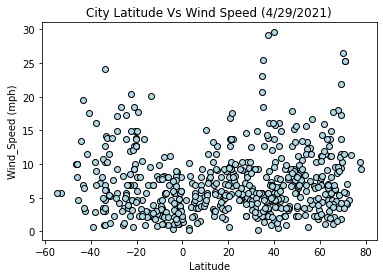

In [41]:
x_axis = clean_city_data.Lat
y_axis = clean_city_data.Wind_Speed
plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="black")
plt.title(f"City Latitude Vs Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed (mph)")
plt.savefig('../output_data/Fig04.png')
plt.show()

The map is showing that the wind speed in a city is not related to the latitude.

## Linear Regression

In [29]:
clean_city_data_north = clean_city_data.loc[weather_df['Lat'] >= 0 ]
clean_city_data_south = clean_city_data.loc[weather_df['Lat'] < 0 ]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.88


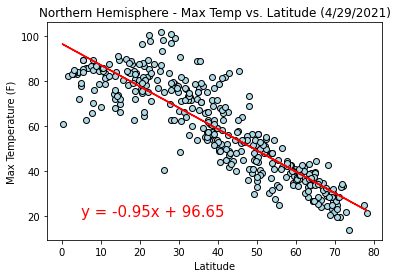

In [42]:
x_axis = clean_city_data_north.Lat
y_axis = clean_city_data_north.Max_Temp

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5,20),fontsize=15,color="red")

plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"Northern Hemisphere - Max Temp vs. Latitude ({date})" )
print(f"The r-value is: {round(rvalue,2)}")
plt.savefig('../output_data/Fig05.png')
plt.show()

There is a strong correlation between latitude and max temperature. 
For the northern hemisphere, the max temperature is less than 20 when the latitude is in higher than 70. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.63


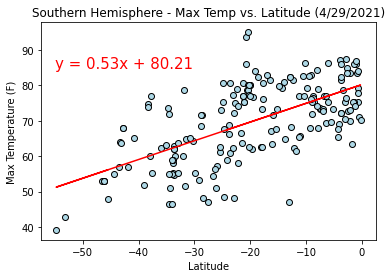

In [43]:
x_axis = clean_city_data_south.Lat
y_axis = clean_city_data_south.Max_Temp

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,85),fontsize=15,color="red")

plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"Southern Hemisphere - Max Temp vs. Latitude ({date})" )
print(f"The r-value is: {round(rvalue,2)}")
plt.savefig('../output_data/Fig06.png')
plt.show()

There is a strong correlation between latitude and max temperature. 
For the southern hemisphere, the max temperature is high when the latitude is close to zero 
for the majority of the cities. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.24


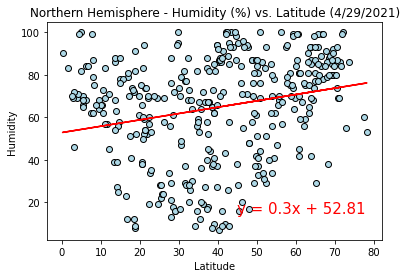

In [44]:
x_axis = clean_city_data_north.Lat
y_axis = clean_city_data_north.Humidity

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(45,15),fontsize=15,color="red")

plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Northern Hemisphere - Humidity (%) vs. Latitude ({date})" )
print(f"The r-value is: {round(rvalue,2)}")
plt.savefig('../output_data/Fig07.png')
plt.show()

There is a weak correlation between humidity and latitude.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.26


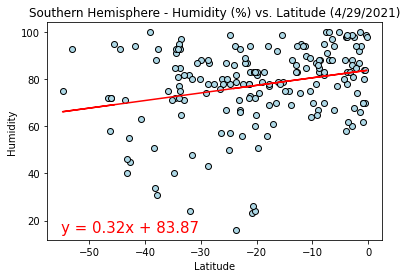

In [45]:
x_axis = clean_city_data_south.Lat
y_axis = clean_city_data_south.Humidity

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")

plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Southern Hemisphere - Humidity (%) vs. Latitude ({date})" )
print(f"The r-value is: {round(rvalue,2)}")
plt.savefig('../output_data/Fig08.png')
plt.show()

There is a weak correlation between humidity and latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.25


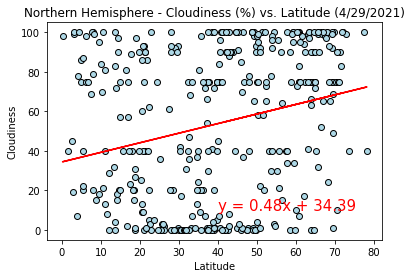

In [46]:
x_axis = clean_city_data_north.Lat
y_axis = clean_city_data_north.Cloudiness

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")


plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Northern Hemisphere - Cloudiness (%) vs. Latitude ({date})" )
print(f"The r-value is: {round(rvalue,2)}")
plt.savefig('../output_data/Fig09.png')
plt.show()


There is a weak correlation between cloudiness and latitude.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.23


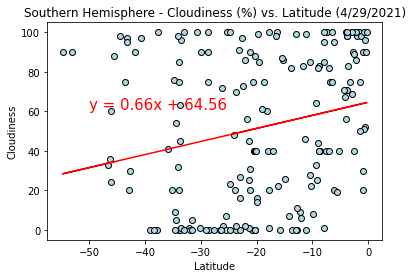

In [47]:
x_axis = clean_city_data_south.Lat
y_axis = clean_city_data_south.Cloudiness

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,61),fontsize=15,color="red")


plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Southern Hemisphere - Cloudiness (%) vs. Latitude ({date})" )
print(f"The r-value is: {round(rvalue,2)}")
plt.savefig('../output_data/Fig10.png')
plt.show()


There is a weak correlation between cloudiness and latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.15


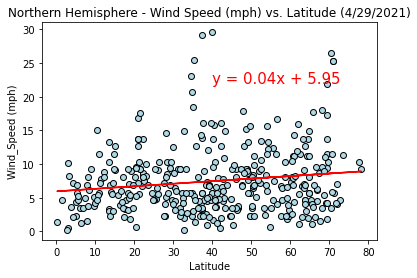

In [48]:
x_axis = clean_city_data_north.Lat
y_axis = clean_city_data_north.Wind_Speed

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(40,22),fontsize=15,color="red")

plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed (mph)")
plt.title(f"Northern Hemisphere - Wind Speed (mph) vs. Latitude ({date})" )
print(f"The r-value is: {round(rvalue,2)}")
plt.savefig('../output_data/Fig11.png')
plt.show()

There is a very weak correlation between wind speeds and latitude.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.29


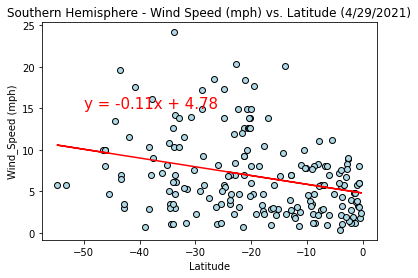

In [49]:
x_axis = clean_city_data_south.Lat
y_axis = clean_city_data_south.Wind_Speed

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")

plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed (mph)")
plt.title(f"Southern Hemisphere - Wind Speed (mph) vs. Latitude ({date})" )
print(f"The r-value is: {round(rvalue,2)}")
plt.savefig('../output_data/Fig12.png')
plt.show()

There is a very weak correlation between wind speeds and latitude.